In [27]:
# 必要なパッケージをインポート
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from statsmodels.graphics.tsaplots import plot_acf


In [28]:
import pymc as pm
import arviz as az
import pytensor.tensor as pt

In [29]:
print(np.__version__)
print(pm.__version__)
print(az.__version__)

1.23.5
5.7.2
0.15.1


## データの準備など

In [30]:
# 各項目のデータの準備

# カテゴリ×カテゴリ
cc_parray = pd.read_csv(f"../data/3-10-1-interaction-1.csv")
cc_df = pd.DataFrame(cc_parray)
print(cc_df.shape)
display(cc_df.head())

# カテゴリ×数量
cn_parray = pd.read_csv(f"../data/3-10-2-interaction-2.csv")
cn_df = pd.DataFrame(cn_parray)
print(cn_df.shape)
display(cn_df.head())

# 数量×数量
nn_parray = pd.read_csv(f"../data/3-10-3-interaction-3.csv")
nn_df = pd.DataFrame(nn_parray)
print(nn_df.shape)
display(nn_df.head())

(100, 3)


,sales,publicity,bargen
0,87.5,not,not
1,103.7,not,not
2,83.3,not,not
3,131.9,not,not
4,106.6,not,not


(100, 3)


,sales,publicity,temperature
0,74.0,not,8.0
1,60.2,not,11.2
2,91.2,not,17.2
3,81.8,not,27.2
4,90.9,not,6.1


(100, 3)


,sales,product,clerk
0,142.5,17,3
1,193.2,38,4
2,376.7,33,9
3,231.0,17,8
4,134.8,48,3


## カテゴリ×カテゴリ

### 可視化

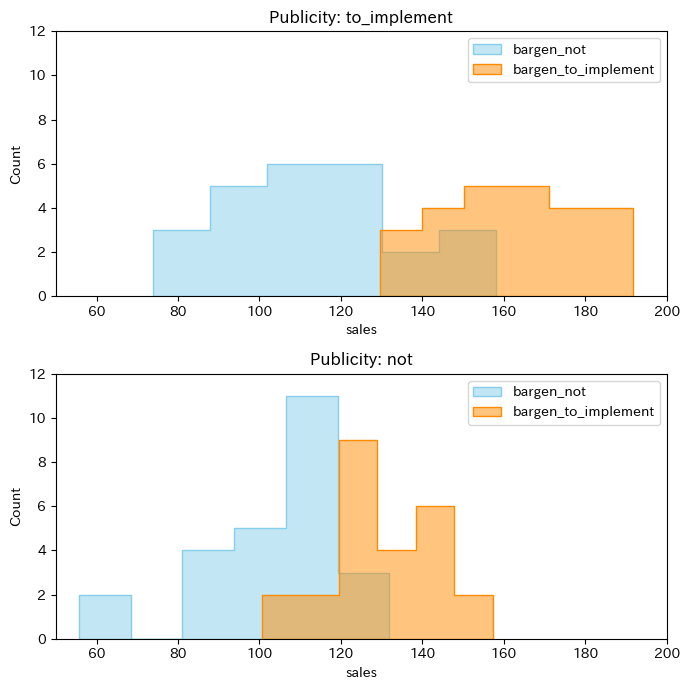

In [54]:
# ヒストグラムで分布可視化
pub_imp_df = cc_df[cc_df["publicity"]=="to_implement"]
pub_not_df = cc_df[cc_df["publicity"]=="not"]

fig, axes = plt.subplots(2, 1, figsize=(7, 7))
sns.histplot(pub_imp_df[pub_imp_df["bargen"]=="not"]["sales"], 
                  ax=axes[0], color="skyblue", alpha=0.5, element="step",
                  label="bargen_not")
sns.histplot(pub_imp_df[pub_imp_df["bargen"]=="to_implement"]["sales"], 
                  ax=axes[0], color="darkorange", alpha=0.5, element="step", 
                  label="bargen_to_implement")

sns.histplot(pub_not_df[pub_not_df["bargen"]=="not"]["sales"], 
                  ax=axes[1], color="skyblue", alpha=0.5, element="step",
                  label="bargen_not")
sns.histplot(pub_not_df[pub_not_df["bargen"]=="to_implement"]["sales"], 
                  ax=axes[1], color="darkorange", alpha=0.5, element="step", 
                  label="bargen_to_implement")

# 軸の設定
for ax in axes:
    ax.set_xlim(50, 200)
    ax.set_ylim(0, 12)
    ax.legend()

# 各axesにタイトル
axes[0].set_title("Publicity: to_implement")
axes[1].set_title("Publicity: not")

plt.tight_layout()
plt.show()

In [69]:
# データの準備
y = cc_parray["sales"].values
X_df = pd.get_dummies(cc_parray.drop("sales",axis=1), dtype=int, drop_first=True)
X_df = X_df.rename(columns = {"publicity_to_implement":"publicity", 
                    "bargen_to_implement":"bargen"})
X_df["pub_bagen"] = X_df["publicity"] * X_df["bargen"]
col_li = X_df.columns
X = X_df.values

print(y.shape)
print(y[:10])
print(X.shape)
print(X[:10])
print(col_li)

(100,)
[ 87.5 103.7  83.3 131.9 106.6  83.6 109.7 114.8 111.5  93.9]
(100, 3)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Index(['publicity', 'bargen', 'pub_bagen'], dtype='object')


### ベイズ推論

In [ ]:
# 確率モデルの定義
model = pm.Model(coords={"predictors":col_li})

with model:
    # 観測値をDataとして定義
    X_data = pm.Data("X_data", X.T, mutable=True)
    y_data = pm.Data("y_data", y, mutable=True)

    # パラメータの事前分布を定義
    b0 = pm.Normal("b0", mu=0, sigma=10000)
    b = pm.Normal("b", mu=0, sigma=10000, dims="predictors") # 仮説は無いので一括で同様に設定

    # 目的変数の期待値を確率変数として定義
    mu = pm.Deterministic("mu", b @ X_data + b0)



In [ ]:
# サンプリング

### 結果解釈

## カテゴリ×数量

### 可視化

### ベイズ推論

### 結果解釈

## 数量×数量

### 可視化

### ベイズ推論

### 結果解釈